In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Analise-de-Predicao-Obito-Sifilis-Congenita\dados\dados_limpos.csv', encoding='latin1')

C:\Users\natal\AppData\Local\Temp\ipykernel_33056\970582942.py:1: DtypeWarning: Columns (14,19,36,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_cleaned = pd.read_csv(r'C:\Users\natal\Github\Analise-de-Predicao-Obito-Sifilis-Congenita\dados\dados_limpos.csv', encoding='latin1')


In [ ]:
data_cleaned.shape

(251659, 65)

In [ ]:
data_cleaned.columns = data_cleaned.columns.str.upper()

In [ ]:
data_cleaned.columns

Index(['UNNAMED: 0', 'TP_NOT', 'SEM_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO',
       'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'SEM_DIAG',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'ANT_IDADE', 'ANT_RACA',
       'ID_OCUPA_N', 'ESCOLMAE', 'ANT_PRE_NA', 'UF_PRE_NAT', 'MUN_PRE_NA',
       'ANTSIFIL_N', 'LAB_PARTO', 'LAB_TITU_2', 'LAB_DT3', 'LAB_CONF',
       'TRA_ESQUEM', 'TRA_DT', 'ANT_TRATAD', 'ANT_UF_CRI', 'ANT_MUNI_C',
       'LABC_SANGU', 'LABC_TIT_1', 'LABC_DT_1', 'LABC_IGG', 'LABC_DT',
       'LABC_LIQUO', 'LABC_TIT_2', 'LABC_DT_2', 'LABC_TITUL', 'LABC_EVIDE',
       'LABC_LIQ_1', 'TRA_DIAG_T', 'TRA_ESQU_1', 'DS_ESQUEMA', 'EVOLUCAO',
       'DT_OBITO', 'EVO_DIAG_N', 'TRA_DIAG_C', 'CLI_ICTERI', 'CLI_RINITE',
       'CLI_ANEMIA', 'CLI_ESPLEN', 'HEPATO', 'CLI_OSTEO', 'LESOES',
       'CLI_OUTRO', 'SIN_OUTR_E', 'CLI_PSEUDO'],
      dtype='object')

In [ ]:
# Criar colunas de desfecho (óbito por sífilis congênita, aborto e natimorto) com base em EVOLUCAO
data_cleaned['OBITO_SIFILIS'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 2 else 0)
data_cleaned['ABORTO'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 4 else 0)
data_cleaned['NATIMORTO'] = data_cleaned['EVOLUCAO'].apply(lambda x: 1 if x == 5 else 0)

In [ ]:
import matplotlib.pyplot as plt

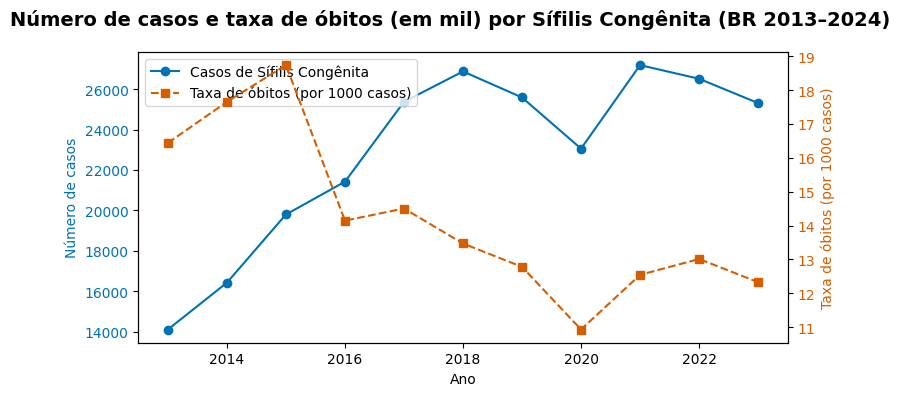

In [ ]:
dados_ano = (
    data_cleaned.groupby("NU_ANO", as_index=False)
    .agg(
        casos=("NU_ANO", "count"),
        obitos=("OBITO_SIFILIS", "sum")
    )
)


dados_ano["taxa_obitos"] = dados_ano["obitos"] / dados_ano["casos"] * 1000  # por 1000 casos


fig, ax1 = plt.subplots(figsize=(8, 4))

# Eixo da esquerda (número de casos)
ax1.plot(dados_ano["NU_ANO"], dados_ano["casos"], color="#0072B2", marker="o", label="Casos de Sífilis Congênita")
ax1.set_xlabel("Ano")
ax1.set_ylabel("Número de casos", color="#0072B2")
ax1.tick_params(axis='y', labelcolor="#0072B2")

# Eixo da direita (taxa de óbitos)
ax2 = ax1.twinx()
ax2.plot(dados_ano["NU_ANO"], dados_ano["taxa_obitos"], color="#D55E00", linestyle="--", marker="s", label="Taxa de óbitos (por 1000 casos)")
ax2.set_ylabel("Taxa de óbitos (por 1000 casos)", color="#D55E00")
ax2.tick_params(axis='y', labelcolor="#D55E00")


fig.suptitle("Número de casos e taxa de óbitos (em mil) por Sífilis Congênita (BR 2013–2024)", fontsize=14, fontweight="bold")

# Combinar legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show()


In [ ]:
dados_ano["taxa_obitos"] = dados_ano["taxa_obitos"].round(2)

print("\n=== Tabela: Casos e Óbitos em mil por Sífilis Congênita ===\n")
print(dados_ano.to_string(index=False))



=== Tabela: Casos e Óbitos em mil por Sífilis Congênita ===

 NU_ANO  casos  obitos  taxa_obitos
   2013  14111     232        16.44
   2014  16428     290        17.65
   2015  19800     371        18.74
   2016  21421     303        14.14
   2017  25374     368        14.50
   2018  26874     362        13.47
   2019  25587     327        12.78
   2020  23056     252        10.93
   2021  27186     341        12.54
   2022  26512     345        13.01
   2023  25310     312        12.33
